# Homework

Perform point-to-point, point-to-plane and colored ICP
using rgb_4, rgb_5, dep_4 and dep_5.

Visualize the unregistered point cloud and the
registered point clouds from the above three methods using Open3D.

Upload the screenshots of the visualizations to [HW6 Google Form](https://forms.gle/GfV2SkDWYJdcqK7B8).

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
w, h, fx, fy, cx, cy, sf = 640, 480, 535.4, 539.2, 320.1, 247.6, 5000
K = o3d.camera.PinholeCameraIntrinsic(width=w, height=h, fx=fx, fy=fy, cx=cx, cy=cy)

In [3]:
K

PinholeCameraIntrinsic with width = 640 and height = 480.
Access intrinsics with intrinsic_matrix.

In [7]:
rgb_4 = o3d.io.read_image("./images/rgb_4.png")
dep_4 = o3d.io.read_image("./images/dep_4.png")
rgb_5 = o3d.io.read_image("./images/rgb_5.png")
dep_5 = o3d.io.read_image("./images/dep_5.png")

In [8]:
rgbd_4 = o3d.geometry.RGBDImage.create_from_color_and_depth(rgb_4, dep_4, depth_scale=sf, convert_rgb_to_intensity=False)
rgbd_5 = o3d.geometry.RGBDImage.create_from_color_and_depth(rgb_5, dep_5, depth_scale=sf, convert_rgb_to_intensity=False)
print(rgbd_4)
print(rgbd_5)

RGBDImage of size 
Color image : 640x480, with 3 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.
RGBDImage of size 
Color image : 640x480, with 3 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


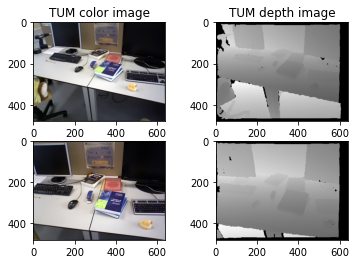

In [9]:
plt.subplot(2, 2, 1)
plt.title('TUM color image')
plt.imshow(rgbd_4.color)
plt.subplot(2, 2, 2)
plt.title('TUM depth image')
plt.imshow(rgbd_4.depth, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(rgbd_5.color)
plt.subplot(2, 2, 4)
plt.imshow(rgbd_5.depth, cmap='gray')
plt.show()

In [11]:
pcd_4 = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_4, K)
pcd_5 = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_5, K)
pcd_unregistered = pcd_4 + pcd_5
o3d.io.write_point_cloud('pcd_unregistered.ply', pcd_unregistered)

True

In [13]:
o3d.visualization.draw_geometries([pcd_unregistered],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

---

In [14]:
reg = o3d.pipelines.registration.registration_icp(pcd_5, pcd_4, 0.1)
pcd_5_t = copy.deepcopy(pcd_5)
pcd_5_t.transform(reg.transformation)
pcd_registered = pcd_4 + pcd_5_t
o3d.visualization.draw_geometries([pcd_registered],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

In [15]:
pcd_4.estimate_normals(o3d.geometry.KDTreeSearchParamKNN(knn=5))
pcd_5.estimate_normals(o3d.geometry.KDTreeSearchParamKNN(knn=5))
reg = o3d.pipelines.registration.registration_icp(pcd_5, pcd_4, 0.1, estimation_method=o3d.pipelines.registration.TransformationEstimationPointToPlane())
pcd_5_t = copy.deepcopy(pcd_5)
pcd_5_t.transform(reg.transformation)
pcd_registered = pcd_4 + pcd_5_t
o3d.io.write_point_cloud('pcd_point_to_plane.ply', pcd_registered)
o3d.visualization.draw_geometries([pcd_registered],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

In [ ]:
reg = o3d.pipelines.registration.registration_colored_icp(pcd_5, pcd_4, 0.1)
pcd_5_t = copy.deepcopy(pcd_5)
pcd_5_t.transform(reg.transformation)
pcd_registered = pcd_4 + pcd_5_t
o3d.io.write_point_cloud('pcd_colored.ply', pcd_registered)
o3d.visualization.draw_geometries([pcd_registered],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])